## Instructions for the assignment
- Add your code when there is the comment "YOUR CODE HERE".
- Use Markdown cells to provide your answers (when applicable)
- Make appropriate comments to your code
- Create a repository in your personal GitHub for the assignment
- Tag the commit that you want to submit as *Final submission*
- Invite me to your respository. My GitHub name is *Panchamy*
- No need to include the data in the GitHub repository
- DO NOT forget to run the entire notebook before submitting.
- Feel free to contact me if you have any questions.

### Deadline for submission is 24th September before 23:59

### Saman Behrouzi  -  samanbehrouzi  -at-  gmail -dot- com

# Google Mobility Data

For this assignment, we will be working with the data from Google mobility report. You can find more information about this data [here](https://www.google.com/covid19/mobility/data_documentation.html?hl=en)

In [1]:
import json
import requests
import pandas as pd
import geopandas as gpd
import plotly.express as px
from zipfile import ZipFile



#### 1. Download mobility data for the whole world from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [2]:
## Download file
def donwload_file(url, out_file_name):
    res = requests.get(url)
    with open(out_file_name,'wb') as f:
        f.write(res.content)

In [3]:
## Extract specific files from a zip file
def extract_files(zip_file_path, output_dir, *file_names):
    with ZipFile(zip_file_path, "r") as z:
        for fn in file_names:
            try:
                z.extract(fn, output_dir)
            except Exception as e:
                print("ERROR: - {} - | {}".format(fn, e))
                return False
    return True


In [4]:
'''
This cell is to download and extract the Regions CSV files.
If you cloned the whole repository so you DO NOT NEED TO RUN THIS CELL.
But if you want to run the analysis on another region, feel free to download 
and extract your desired files.
'''
regions_file_name = "Region_Mobility_Report_CSVs.zip"

## Download the Regions CSV files | Please uncomment the following lines to download  
# reg_csvs_url = "https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip"
# donwload_file(reg_csvs_url, regions_file_name)


## Extract 2020-2021 NL region files
extract_files(regions_file_name, "data", "2020_NL_Region_Mobility_Report.csv", "2021_NL_Region_Mobility_Report.csv")

First I wanted to pick my home country data (Iran) for this assignment but the file was not provided in the dataset. Hence, I chose the Netherlands' data as it has the lowest mortality rate amongst the top 10 European countries with highest population (higher than 15 million) [REF] and it made this country attractive for further analysis in this assignment.

REF: https://www.worldometers.info/coronavirus/

#### 2. Import the 2020 and 2021 data for this country as a pandas data frame and name it as `df_2020` and `df_2021`. Print the first 5 lines of `df_2020` and `df_2021`

*Hint - Cheatsheet for pandas is available [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)*

In [5]:
df_2020 = pd.read_csv("data/2020_NL_Region_Mobility_Report.csv")
df_2021 = pd.read_csv("data/2021_NL_Region_Mobility_Report.csv")

display(df_2020.head(5))
display(df_2021.head())

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-01,-79.0,-77.0,5.0,-75.0,-83.0,24.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-02,-65.0,-17.0,0.0,-59.0,-22.0,12.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-03,-62.0,-19.0,3.0,-56.0,-12.0,8.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-04,-52.0,-12.0,-23.0,-62.0,-41.0,16.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-05,-52.0,-8.0,-8.0,-61.0,-41.0,16.0


#### 3. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 5 lines of `df`.

In [6]:
df = pd.merge(df_2020, df_2021, how="outer")

display(df.tail(5))
# df.info()

# df.fillna({"sub_region_1": "", "sub_region_2": ""}, inplace=True)
# display(df.head(5))
# df.isnull().sum()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
203471,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-09-10,NaN,NaN,NaN,NaN,-12.0,0.0
203472,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-09-11,NaN,NaN,303.0,NaN,NaN,NaN
203473,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-09-12,NaN,NaN,265.0,NaN,NaN,NaN
203474,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-09-13,NaN,NaN,NaN,NaN,-14.0,2.0
203475,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-09-14,NaN,NaN,NaN,NaN,-10.0,2.0


#### 4. `df` now contains mobility data for your selected country from 2020 and 2021. This table contains data of three different aggregation levels, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Note that some country in the mobility report might not have city or provincial information.

In [7]:
df_nation = df[(df['sub_region_1'].isnull()) & (df['sub_region_2'].isnull())]
df_province = df[(~df['sub_region_1'].isnull()) & (df['sub_region_2'].isnull())]
df_city = df[(~df['sub_region_1'].isnull()) & (~df['sub_region_2'].isnull())]


print("\n - - - Nation Dataframe - - - ")
display(df_nation.head())
# df_nation.info()
# display(df_nation.isnull().sum())

print("\n - - - Province Dataframe - - - ")
display(df_province.head())
# df_province.info()
# display(df_province.isnull().sum())

print("\n - - - City Dataframe - - - ")
display(df_city.head())
# df_city.info()
# display(df_city.isnull().sum())


 - - - Nation Dataframe - - - 


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0



 - - - Province Dataframe - - - 


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
321,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-15,-6.0,0.0,18.0,6.0,1.0,0.0
322,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-16,-10.0,-10.0,-38.0,-12.0,-2.0,1.0
323,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-17,3.0,-2.0,52.0,-24.0,-22.0,3.0
324,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-18,8.0,0.0,45.0,-21.0,-22.0,3.0
325,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-19,4.0,-4.0,49.0,-19.0,-22.0,2.0



 - - - City Dataframe - - - 


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2020-02-15,NaN,NaN,-1.0,NaN,NaN,NaN
643,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2020-02-16,NaN,NaN,-36.0,NaN,NaN,NaN
644,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2020-02-17,NaN,NaN,NaN,NaN,-26.0,3.0
645,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2020-02-18,NaN,NaN,NaN,NaN,-24.0,2.0
646,NL,Netherlands,Drenthe,Aa en Hunze,NaN,NaN,NaN,ChIJd8Zx3YDYt0cR9DTRc8Z6DIg,2020-02-19,NaN,NaN,NaN,NaN,-23.0,1.0


#### 5. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For one of the activity, visualise the percentage changes from the baseline at the city-level OR province-level in a geographical map for a given day.

*Hint: Here is an example of municipal boundaries of Netherlands. You can download the municipal boundaries of Netherlands from this [link](https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json) and here is some [code](https://www.cbs.nl/en-gb/onze-diensten/open-data/statline-as-open-data/cartography) to read this file as well.*

If you cannot find the boundary of your selected country. Feel free to use Netherlands data for this question.

DO NOT forget to label the appropriate axes for the visualisations

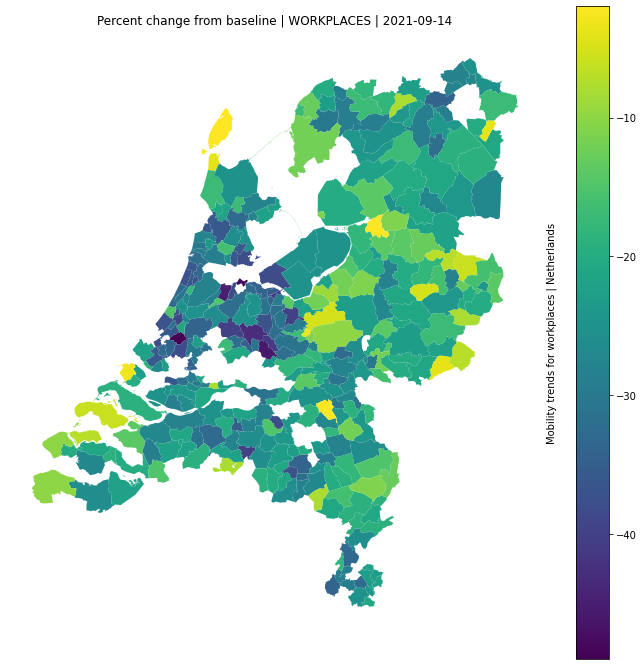

In [8]:
## I already downloaded the municipal boundaries data and fetch it from my disk
municipal_boundaries = gpd.read_file("data/geodata.json")
municipal_boundaries = pd.merge(municipal_boundaries, df_city, left_on = "statnaam", right_on = "sub_region_2")

## Filtering the data for a specific day
municipal_boundaries.query("date == '2021-09-14'", inplace=True)

## just to make sure we have only one entry for each city in a specific day
# municipal_boundaries["statnaam"].is_unique

## Check the number of NaNs in each column and pick a column with the lowest number of NaNs for better visualization
municipal_boundaries.isnull().sum()

## Plotting the map | If you can not see the plot please run this cell again
p = municipal_boundaries.plot(column='workplaces_percent_change_from_baseline', legend=True, figsize = (12,12))
# p.axis('off')
p.get_yaxis().set_ticks([])
p.get_xaxis().set_visible(False)
p.set_ylabel("Mobility trends for workplaces | Netherlands")
p.yaxis.set_label_position("right")
p.set_title('Percent change from baseline | WORKPLACES | 2021-09-14')
p.spines['top'].set_visible(False)
p.spines['right'].set_visible(False)
p.spines['bottom'].set_visible(False)
p.spines['left'].set_visible(False)


#### 6. Create a new dataframe that only contains data from the *province* with the largest percentage changes in your chosen activity from *Question 5*, which you found in the previous question and name it as `df_province_largest`. Print the first 5 lines of `df_province_largest`

### Utrecht has the highest percentage change in workplaces

In [9]:
''' 
I used mean to get a general sense of percentage changes in the past. 
Finally Utrecht was selected as a province with the highest percentage change in workplaces.
Applying Sum and Mean for aggregation process, both showed the **Utrecht** has the highest percentage change.
'''
prvnc_changes_mean = df_province.groupby("sub_region_1", as_index=False).agg({"workplaces_percent_change_from_baseline": "mean"})
# display(prvnc_changes_mean.sort_values("workplaces_percent_change_from_baseline"))

## Selecting a province with highest percentage change
largest_prvnc_name = prvnc_changes_mean.loc[prvnc_changes_mean['workplaces_percent_change_from_baseline'].idxmin()][0]
df_province_largest = df_province[df_province['sub_region_1'] == largest_prvnc_name].copy()

display(df_province_largest.head())


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
98786,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-15,8.0,0.0,3.0,9.0,-1.0,0.0
98787,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-16,-5.0,-10.0,-22.0,14.0,-3.0,1.0
98788,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-17,2.0,-1.0,2.0,3.0,1.0,0.0
98789,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-18,4.0,3.0,12.0,0.0,2.0,0.0
98790,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-19,6.0,-1.0,12.0,-2.0,1.0,0.0


array([<AxesSubplot:xlabel='date2'>], dtype=object)

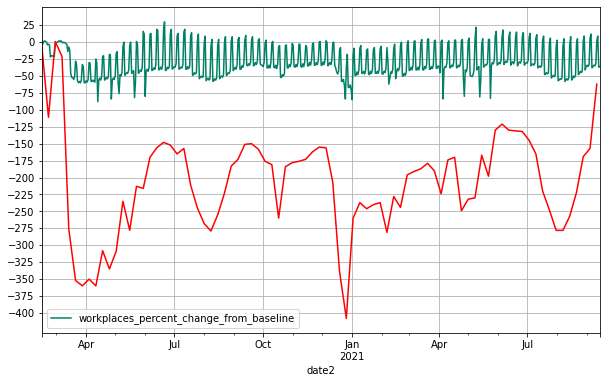

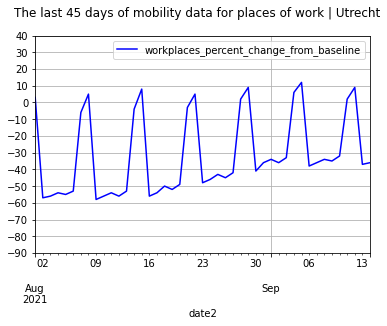

In [10]:
# Execute the cell with the following command to visualize the results

#Your chosen activity. eg: 'workplaces_percent_change_from_baseline'
activity = "workplaces_percent_change_from_baseline"

df_province_largest['date2'] = pd.to_datetime(df_province_largest['date'])

df_province_largest.plot('date2', activity, yticks = range(40,-100,-20), colormap="summer", grid=True, figsize=(10,6), subplots=True)

df_province_largest.resample('7D', on='date2').sum()[activity].plot(yticks = range(25,-425,-25), colormap="autumn", grid=True, figsize=(10,6), subplots=True)

## Visualizing the last 45 days, as it is in Google reports to make it easier for visual comparisons
df_province_largest.tail(45).plot('date2', activity, title = "The last 45 days of mobility data for places of work | Utrecht", yticks = range(40,-100,-10), colormap="winter", grid=True, figsize=(6,4), subplots=True)

#### 7. Compare the results above with the results in the google mobility report pdf of the province of your selected country. Discuss the differences and similarities. Please save the mobility report pdf that you used to compare the results with in your GitHub as well! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)

In [11]:
## Download the report file [2021-09-14_NL_Utrecht_Mobility_Report_en.pdf]
donwload_file("https://www.gstatic.com/covid19/mobility/2021-09-14_NL_Utrecht_Mobility_Report_en.pdf", "data/2021-09-14_NL_Utrecht_Mobility_Report_en.pdf")

## Download the Netherlands' provinces geojson file
# donwload_file("https://www.webuildinternet.com/articles/2015-07-19-geojson-data-of-the-netherlands/provinces.geojson", "data/2015-07-19-geojson-data-of-the-netherlands-provinces.geojson")

# state_names_nl_en = {'Utrecht': 'Utrecht', 'Noord-Holland': 'North Holland', 'Zuid-Holland': 'South Holland', 
#                     'Flevoland': 'Flevoland', 'Groningen': 'Groningen', 'Noord-Brabant': 'North Brabant', 
#                     'Drenthe': 'Drenthe', 'Overijssel': 'Overijssel', 'Friesland (Fryslân)': 'Friesland', 
#                     'Limburg': 'Limburg', 'Gelderland': 'Gelderland', 'Zeeland': 'Zeeland'}

To make a better comparison with the Google reports, I plotted the last 45 days of the mobility data for workplaces in Utrecht (from the early August until 14th of Spetember). My plotted results for the last 45 days are perfectly matching with the Google reports.

The percentage changes in this dataset are calculated based on the baseline median value which is for a period of 5 weeks between Jan 3–Feb 6, 2020 (Roughly the begining of the pandemic in Europe / no lockdown yet).

The results show that the percentage changes are converging with the baseline with a notable slope. It means that the pandemic situation is under control at Utrecht. It is expected that this convergence continue as roughly 80 percent of the whole Netherlands' population (12 years and older) have been vaccinated and it is continuing at a fast pace. [REF]

Note that when we look at the mobility plot for workplaces we should neglect the peaks that are occurring at weekends or public holidays (yet I wonder why these weekend peaks are pushing higher than the baseline each week. Maybe the vaccines are doubling people's energy :) or maybe it is an indication of a notable change in people's lifestyles during the lockdown peroid).


REF: https://coronadashboard.government.nl/landelijk/vaccinaties

# BONUS

#### Animate the percentage change over different days for the mobility activity that you chose. This is a continuation of *question 5*. 

This is a bonus question. So feel free to skip if you do not have sufficient time

## The following cell's output would be more than 100 MB. Please run it yourself to see the animation

In [ ]:
'''
Please be patient with this cell and give it some time to load the map.
Sit back and take a sip of coffee, it may take a few minutes :D
Do not forget to hit the PLAY button to RUN THE ANIMATION.
'''

## Reading Netherlands' provincial geometry data
provincial_boundries_NL = gpd.read_file("data/2015-07-19-geojson-data-of-the-netherlands-provinces.geojson")
# display(provincial_boundries_NL)

## Extracting coordinates of each province to add to the "df_province"
state_geometry_map = {}
for index,row in provincial_boundries_NL.iterrows():
    state_geometry_map[row["name"]] = row["geometry"]

## Renaming some columns
df_province = df_province.rename(columns={'sub_region_1': 'name', 'workplaces_percent_change_from_baseline': 'Workplaces % change'})


## Adding geometry data to the "df_province"
df_province["geometry"] = df_province["name"].apply(lambda x: state_geometry_map[x])
# display(df_province.tail())

## Reading Netherlands' provincial geometry data as a json file to feed to our Choropleth figure
with open("data/2015-07-19-geojson-data-of-the-netherlands-provinces.geojson", "r") as j:
    municipal_boundaries_NL_json = json.load(j)

## Selecting the 2021 data for visualization to lower the memory usage and faster execution
df_province = df_province[df_province['date'].str.startswith("2021-") == True]


fig = px.choropleth_mapbox(
    df_province,
    geojson=municipal_boundaries_NL_json,
    locations="name",
    featureidkey="properties.name",
    color="Workplaces % change",
    hover_name="name",
    color_continuous_scale="portland",
    animation_frame="date",
    hover_data=["Workplaces % change"],
    title="Netherlands mobility trends for places of work",
    mapbox_style="open-street-map",
    center={"lat": 52.0, "lon": 5.0},
    zoom=5,
    opacity=0.5,
    width=900,
    height=600,
)

fig.show()
